In [11]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_transactions = 1000
fraud_ratio = 0.05

# Features
transaction_amount = np.random.exponential(scale=100, size=num_transactions)
transaction_time = np.random.uniform(low=0, high=24, size=num_transactions)
is_fraud = np.random.choice([0, 1], size=num_transactions, p=[1-fraud_ratio, fraud_ratio])

# Create DataFrame
data = pd.DataFrame({
    'TransactionAmount': transaction_amount,
    'TransactionTime': transaction_time,
    'IsFraud': is_fraud
})

# Display the first few rows of the dataset
data.head(20)

,TransactionAmount,TransactionTime,IsFraud
0,46.926809,4.443190,0
1,301.012143,13.005623,0
2,131.674569,20.950700,0
3,91.294255,17.573397,0
4,16.962487,19.357468,0
5,16.959629,15.810801,0
6,5.983877,16.614638,0
7,201.123086,20.380696,0
8,91.908215,5.992032,0
9,123.125006,11.746199,0


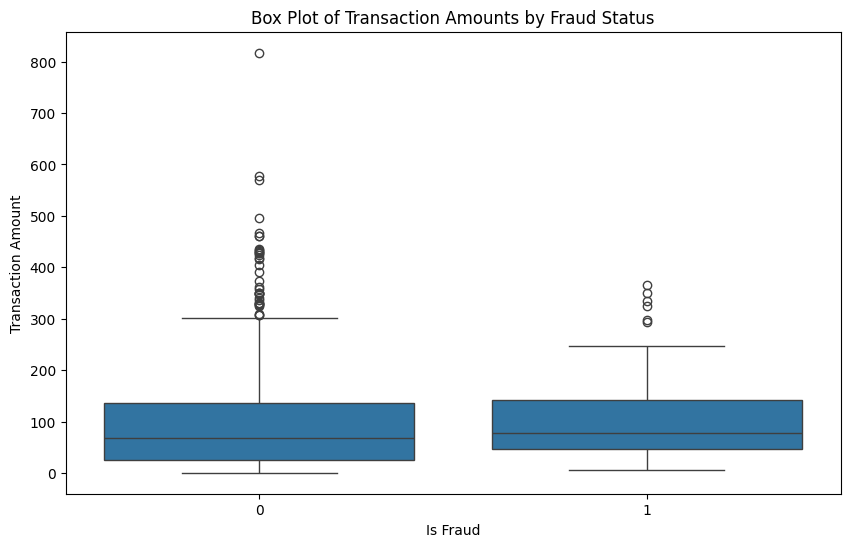

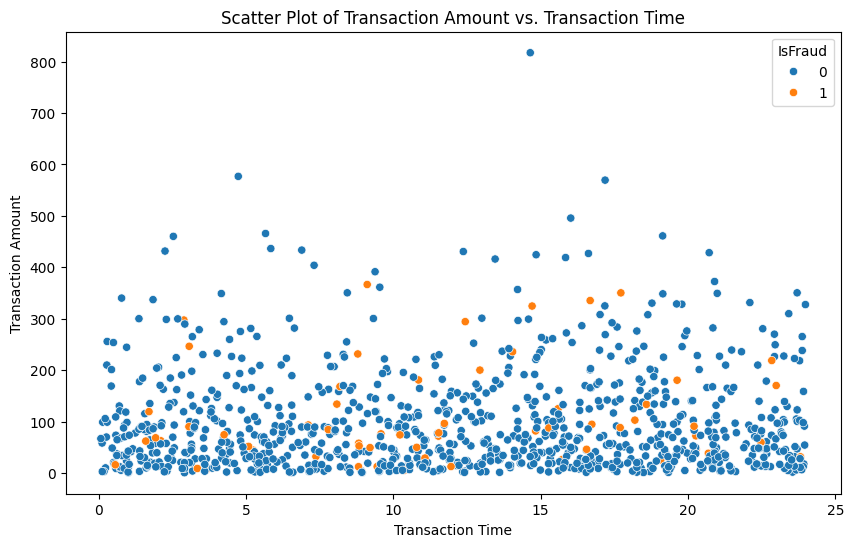

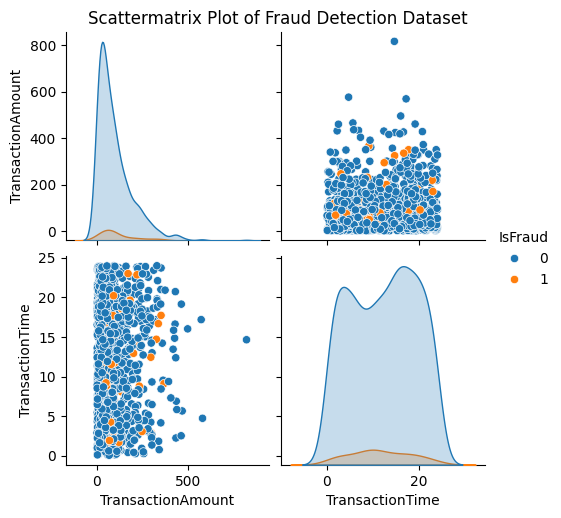

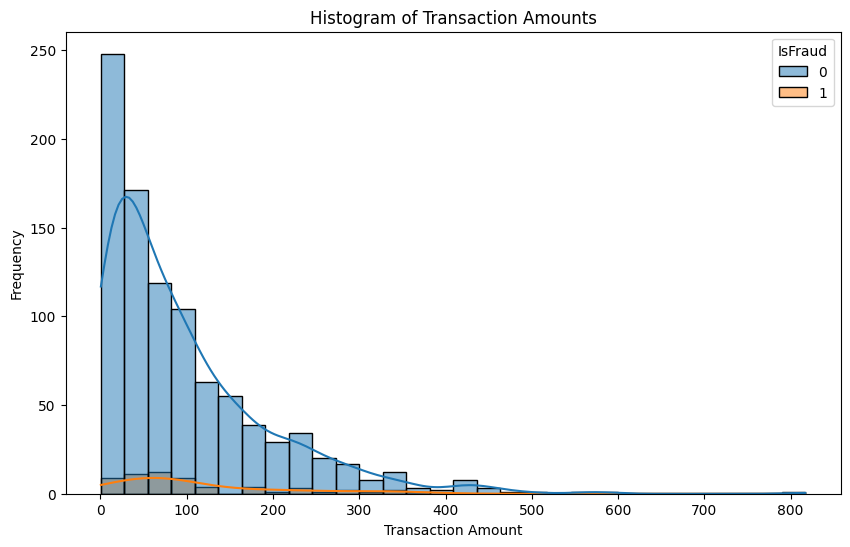

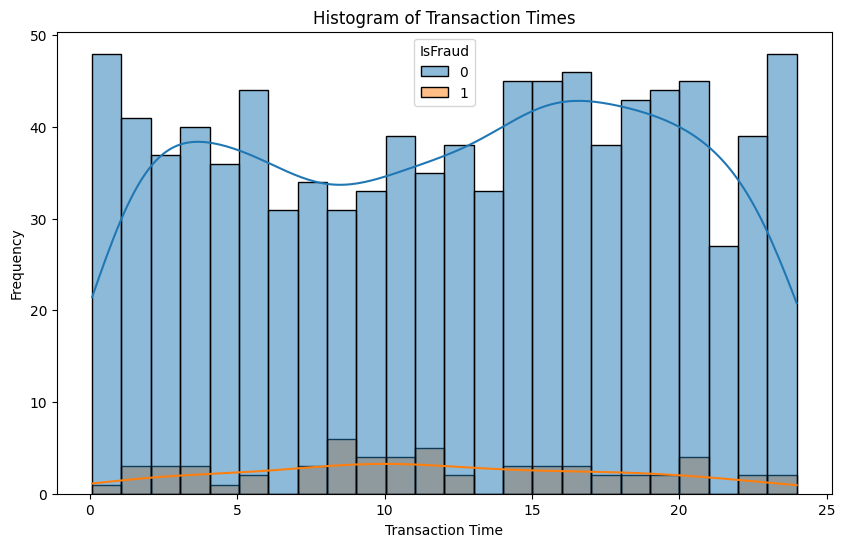

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of transaction amounts by fraud status
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsFraud', y='TransactionAmount', data=data)
plt.title('Box Plot of Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()


# Scatter plot of transaction amount vs. transaction time, colored by fraud status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TransactionTime', y='TransactionAmount', hue='IsFraud', data=data)
plt.title('Scatter Plot of Transaction Amount vs. Transaction Time')
plt.xlabel('Transaction Time')
plt.ylabel('Transaction Amount')
plt.show()


# Scattermatrix plot of the dataset
sns.pairplot(data, hue='IsFraud', diag_kind='kde')
plt.suptitle('Scattermatrix Plot of Fraud Detection Dataset', y=1.02)
plt.show()


# Histogram of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='TransactionAmount', hue='IsFraud', bins=30, kde=True)
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Histogram of transaction times
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='TransactionTime', hue='IsFraud', bins=24, kde=True)
plt.title('Histogram of Transaction Times')
plt.xlabel('Transaction Time')
plt.ylabel('Frequency')
plt.show()


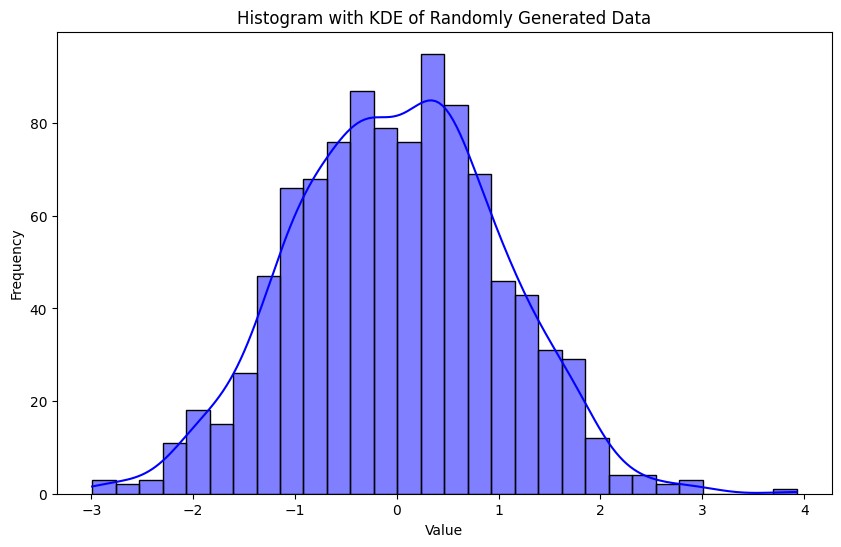

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate some example data
data = np.random.randn(1000)  # 1000 random numbers from a normal distribution

# Create a histogram with Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Histogram with KDE of Randomly Generated Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [3]:
import yfinance as yf
import pandas as pd

# Download historical stock price data for Apple (AAPL) for the last 5 years
data = yf.download('AAPL', start='2010-01-01', end='2023-05-01')
data = data[['Close']]  # We'll use the closing price for prediction
data.head()

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714


In [7]:
import numpy as np

# Create the dataset with features and labels
def create_dataset(data, window_size=5):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Prepare the data
window_size = 5
data_values = data['Close'].values
X, y = create_dataset(data_values, window_size)

# Split the data into training and test sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Train MSE: 0.5490611351730039
Test MSE: 8.319911880180033


In [12]:
# Make future predictions using the last available data points
last_window = data_values[-window_size:]
next_day_prediction = model.predict([last_window])
print(f'Predicted closing price for the next day: {next_day_prediction[0]}')

Predicted closing price for the next day: 170.2480445208226


Accuracy: 0.94
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


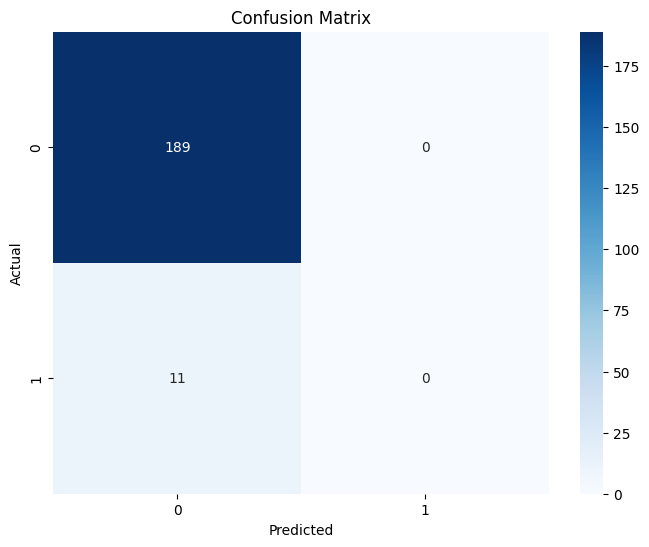

New transaction prediction (1 = Fraud, 0 = Not Fraud): 0


/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Collection
# Generate synthetic data
np.random.seed(42)
num_transactions = 1000
fraud_ratio = 0.05

# Features
transaction_amount = np.random.exponential(scale=100, size=num_transactions)
transaction_time = np.random.uniform(low=0, high=24, size=num_transactions)
is_fraud = np.random.choice([0, 1], size=num_transactions, p=[1-fraud_ratio, fraud_ratio])

# Create DataFrame
data = pd.DataFrame({
    'TransactionAmount': transaction_amount,
    'TransactionTime': transaction_time,
    'IsFraud': is_fraud
})

# Step 2: Data Preprocessing
# Split the data into features (X) and labels (y)
X = data[['TransactionAmount', 'TransactionTime']]
y = data['IsFraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Model Training
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 4: Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 5: Making Predictions
# Make a prediction on a new transaction
new_transaction = np.array([[120, 12]])  # Example: transaction amount = 120, transaction time = 12
new_transaction_scaled = scaler.transform(new_transaction)
new_prediction = model.predict(new_transaction_scaled)

print(f'New transaction prediction (1 = Fraud, 0 = Not Fraud): {new_prediction[0]}')

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def generate_synthetic_image(shape, img_size=64):
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    if shape == 'circle':
        cv2.circle(img, (img_size//2, img_size//2), img_size//4, 255, -1)
    elif shape == 'square':
        cv2.rectangle(img, (img_size//4, img_size//4), (3*img_size//4, 3*img_size//4), 255, -1)
    return img

def create_synthetic_dataset(num_samples, img_size=64):
    images = []
    labels = []
    for _ in range(num_samples):
        shape = np.random.choice(['circle', 'square'])
        img = generate_synthetic_image(shape, img_size)
        images.append(img)
        labels.append(0 if shape == 'circle' else 1)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

num_samples = 1000
img_size = 64
X, y = create_synthetic_dataset(num_samples, img_size)

# Normalize the images
X = X / 255.0

# Reshape the images for the model
X = X.reshape(X.shape[0], img_size, img_size, 1)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
!pip install opencv-python

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error (MAE): 0.59
Mean Squared Error (MSE): 0.65
Root Mean Squared Error (RMSE): 0.81
R-squared (R2): 0.81


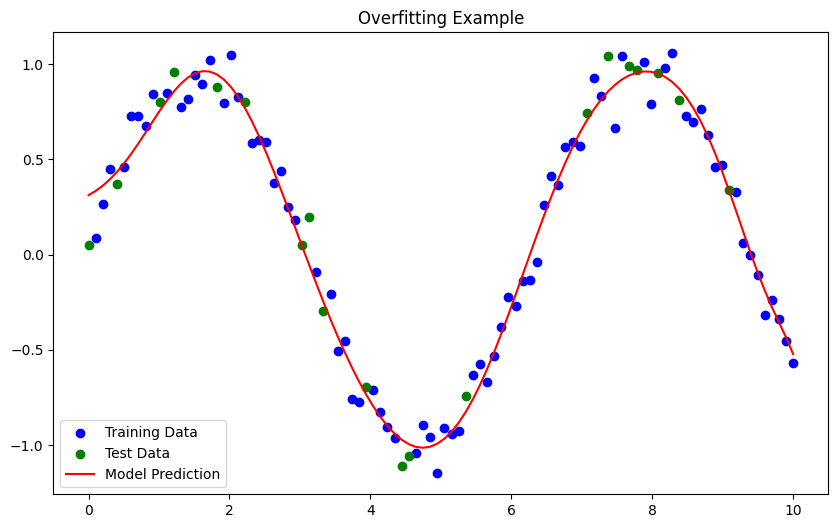

Train MSE: 0.01
Test MSE: 0.01


In [2]:
# Example code to illustrate overfitting
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, 100)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a polynomial regression model (degree 15) to overfit the data
poly = PolynomialFeatures(degree=15)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X, model.predict(poly.transform(X)), color='red', label='Model Prediction')
plt.legend()
plt.title('Overfitting Example')
plt.show()

print(f'Train MSE: {mean_squared_error(y_train, y_train_pred):.2f}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_pred):.2f}')

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  
Mean Absolute Error (MAE): 3.19
Mean Squared Error (MSE): 24.29
Root Mean Squared Error (RMSE): 4.93
R-squared (R2): 0.67


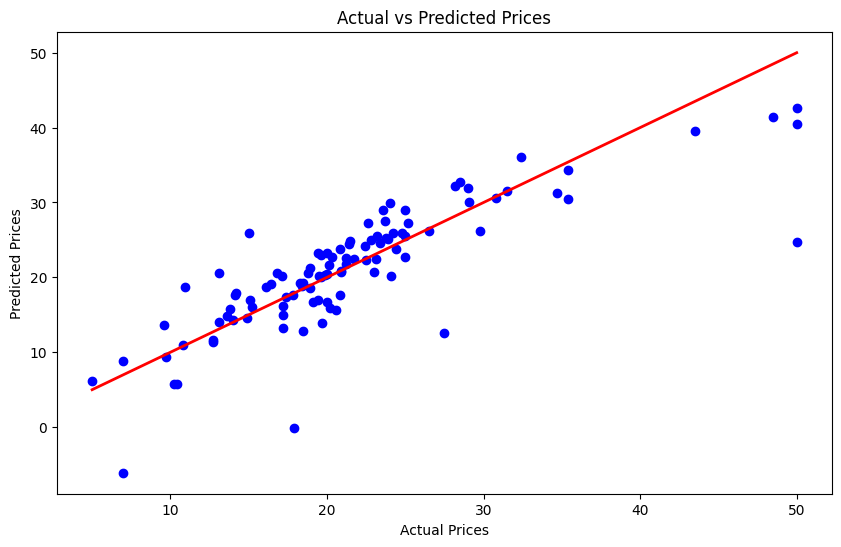

Predicted price for the new home: $25162.00


/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Collect Data
# Fetch the Boston Housing dataset from OpenML
boston = fetch_openml(data_id=531, as_frame=True)
X = boston.data
y = boston.target


# Create a DataFrame for better visualization and manipulation
df = pd.DataFrame(X, columns=boston.feature_names)
df['PRICE'] = y

# Display the first few rows of the dataset
print(df.head())

# Step 2: Preprocess Data
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Build the Model
# Create a Linear Regression model
model = LinearRegression()

# Step 4: Train the Model
# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Step 5: Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Step 6: Make Predictions
# Example: Predict the price of a new home with custom features
new_home_features = np.array([[0.2, 0, 7.07, 0, 0.469, 6.421, 78.9, 4.9671, 2, 242, 17.8, 396.90, 9.14]])
new_home_features_scaled = scaler.transform(new_home_features)
predicted_price = model.predict(new_home_features_scaled)
print(f'Predicted price for the new home: ${predicted_price[0]*1000:.2f}')

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  
Mean Absolute Error (MAE): 3.19
Mean Squared Error (MSE): 24.29
Root Mean Squared Error (RMSE): 4.93
R-squared (R2): 0.67


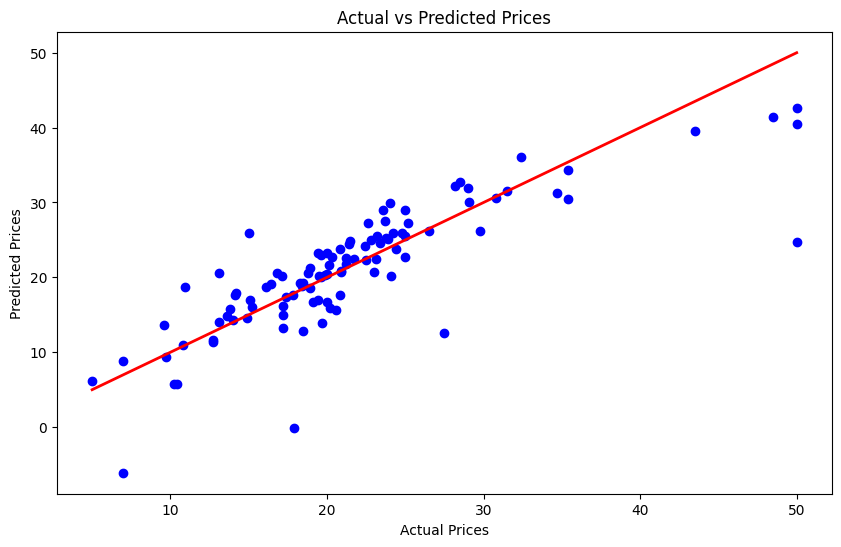

Predicted price for the new home: $25162.00


/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Fetch the Boston Housing dataset from OpenML
boston = fetch_openml(data_id=531, as_frame=True)
X = boston.data
y = boston.target

# Display the first few rows of the dataset
print(X.head())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Example: Predict the price of a new home with custom features
new_home_features = np.array([[0.2, 0, 7.07, 0, 0.469, 6.421, 78.9, 4.9671, 2, 242, 17.8, 396.90, 9.14]])
new_home_features_scaled = scaler.transform(new_home_features)
predicted_price = model.predict(new_home_features_scaled)
print(f'Predicted price for the new home: ${predicted_price[0]*1000:.2f}')

               Open     High      Low    Close
2014-11-24  16402.9  16421.9  16291.2  16314.0
2014-11-25  16314.0  16414.7  16302.8  16413.1
2014-11-26  16415.5  16459.2  16396.9  16453.6
2014-11-27  16452.2  16456.4  16425.0  16431.5
2014-11-28  16402.3  16406.2  16307.9  16319.5
Mean Absolute Error (MAE): 42.271782
Mean Squared Error (MSE): 3279.392440
Root Mean Squared Error (RMSE): 57.265980


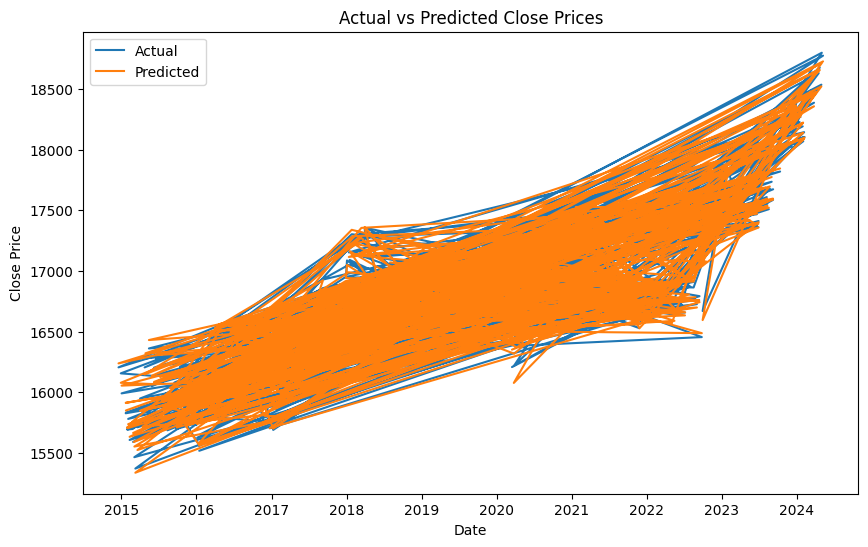

/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but 

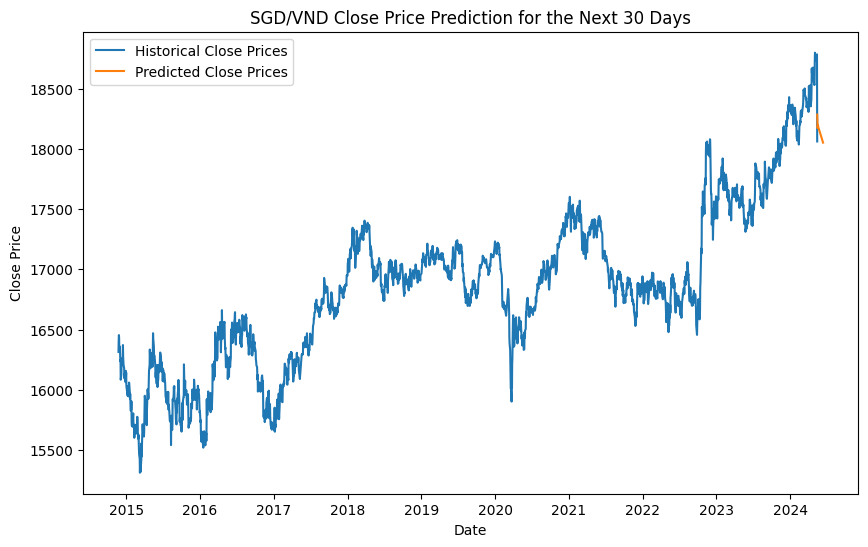

            Predicted_Close
2024-05-14     18284.561653
2024-05-15     18242.943447
2024-05-16     18174.071949
2024-05-17     18187.108071
2024-05-18     18198.292461
2024-05-19     18185.210314
2024-05-20     18175.673500
2024-05-21     18172.948239
2024-05-22     18168.322554
2024-05-23     18161.893913
2024-05-24     18156.253495
2024-05-25     18151.052860
2024-05-26     18145.560696
2024-05-27     18139.971237
2024-05-28     18134.479065
2024-05-29     18129.002163
2024-05-30     18123.492496
2024-05-31     18117.980491
2024-06-01     18112.476749
2024-06-02     18106.970874
2024-06-03     18101.460977
2024-06-04     18095.950398
2024-06-05     18090.439288
2024-06-06     18084.926632
2024-06-07     18079.412508
2024-06-08     18073.897210
2024-06-09     18068.380678
2024-06-10     18062.862830
2024-06-11     18057.343695
2024-06-12     18051.823293


In [7]:
import requests
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Collect Data
# Replace 'YOUR_API_KEY' with your actual Alpha Vantage API key
api_key = '2CQIBKI5638ILVG7'
symbol = 'SGD/VND'
url = f'https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=SGD&to_symbol=VND&apikey={api_key}&outputsize=full'

# Get the data
response = requests.get(url)
data = response.json()

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data['Time Series FX (Daily)']).T
df.columns = ['Open', 'High', 'Low', 'Close']
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df = df.apply(pd.to_numeric)

# Display the first few rows of the dataset
print(df.head())

# Step 2: Preprocess Data
# We will predict the next day's closing price based on previous day's data
df['Next_Close'] = df['Close'].shift(-1)
df = df.dropna()

# Split the data into features and labels
X = df[['Open', 'High', 'Low', 'Close']]
y = df['Next_Close']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Build the Model
# Create a Linear Regression model
model = LinearRegression()

# Step 4: Train the Model
# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Step 5: Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.6f}')
print(f'Mean Squared Error (MSE): {mse:.6f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.6f}')

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()

# Step 6: Make Predictions for the Next 30 Days
# Initialize the data with the latest available data
last_data = df.iloc[-1][['Open', 'High', 'Low', 'Close']].values.reshape(1, -1)
last_data_scaled = scaler.transform(last_data)

predictions = []
for _ in range(30):
    # Predict the next closing price
    next_close = model.predict(last_data_scaled)[0]
    predictions.append(next_close)
    
    # Prepare the next input data (shift the window)
    new_row = last_data[0].copy()
    new_row[-1] = next_close
    last_data = np.roll(last_data, -1)
    last_data[0, -1] = next_close
    last_data_scaled = scaler.transform(last_data)

# Create a date range for the next 30 days
last_date = df.index[-1]
future_dates = pd.date_range(last_date, periods=30, freq='D')

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(predictions, index=future_dates, columns=['Predicted_Close'])

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Historical Close Prices')
plt.plot(predictions_df.index, predictions_df['Predicted_Close'], label='Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SGD/VND Close Price Prediction for the Next 30 Days')
plt.legend()
plt.show()

# Display the predicted close prices for the next 30 days
print(predictions_df)